In [14]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as stats
import statsmodels.api as sm

from scipy.stats import t

import matplotlib.pyplot as plt


# Problem 13

This question should be answered using the Weekly data set, which
is part of the ISLR2 package. This data is similar in nature to the
Smarket data from this chapter’s lab, except that it contains 1, 089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

In [4]:
weekly = pd.read_csv('Weekly.csv')
#Weekly data like stock market. Direction is the trend of the 'stock'
#based off of 'Today'
weekly['Direction'] = weekly['Direction'] == 'Up'
weekly['Direction'] = weekly['Direction'].astype(int)
weekly.head(1089)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


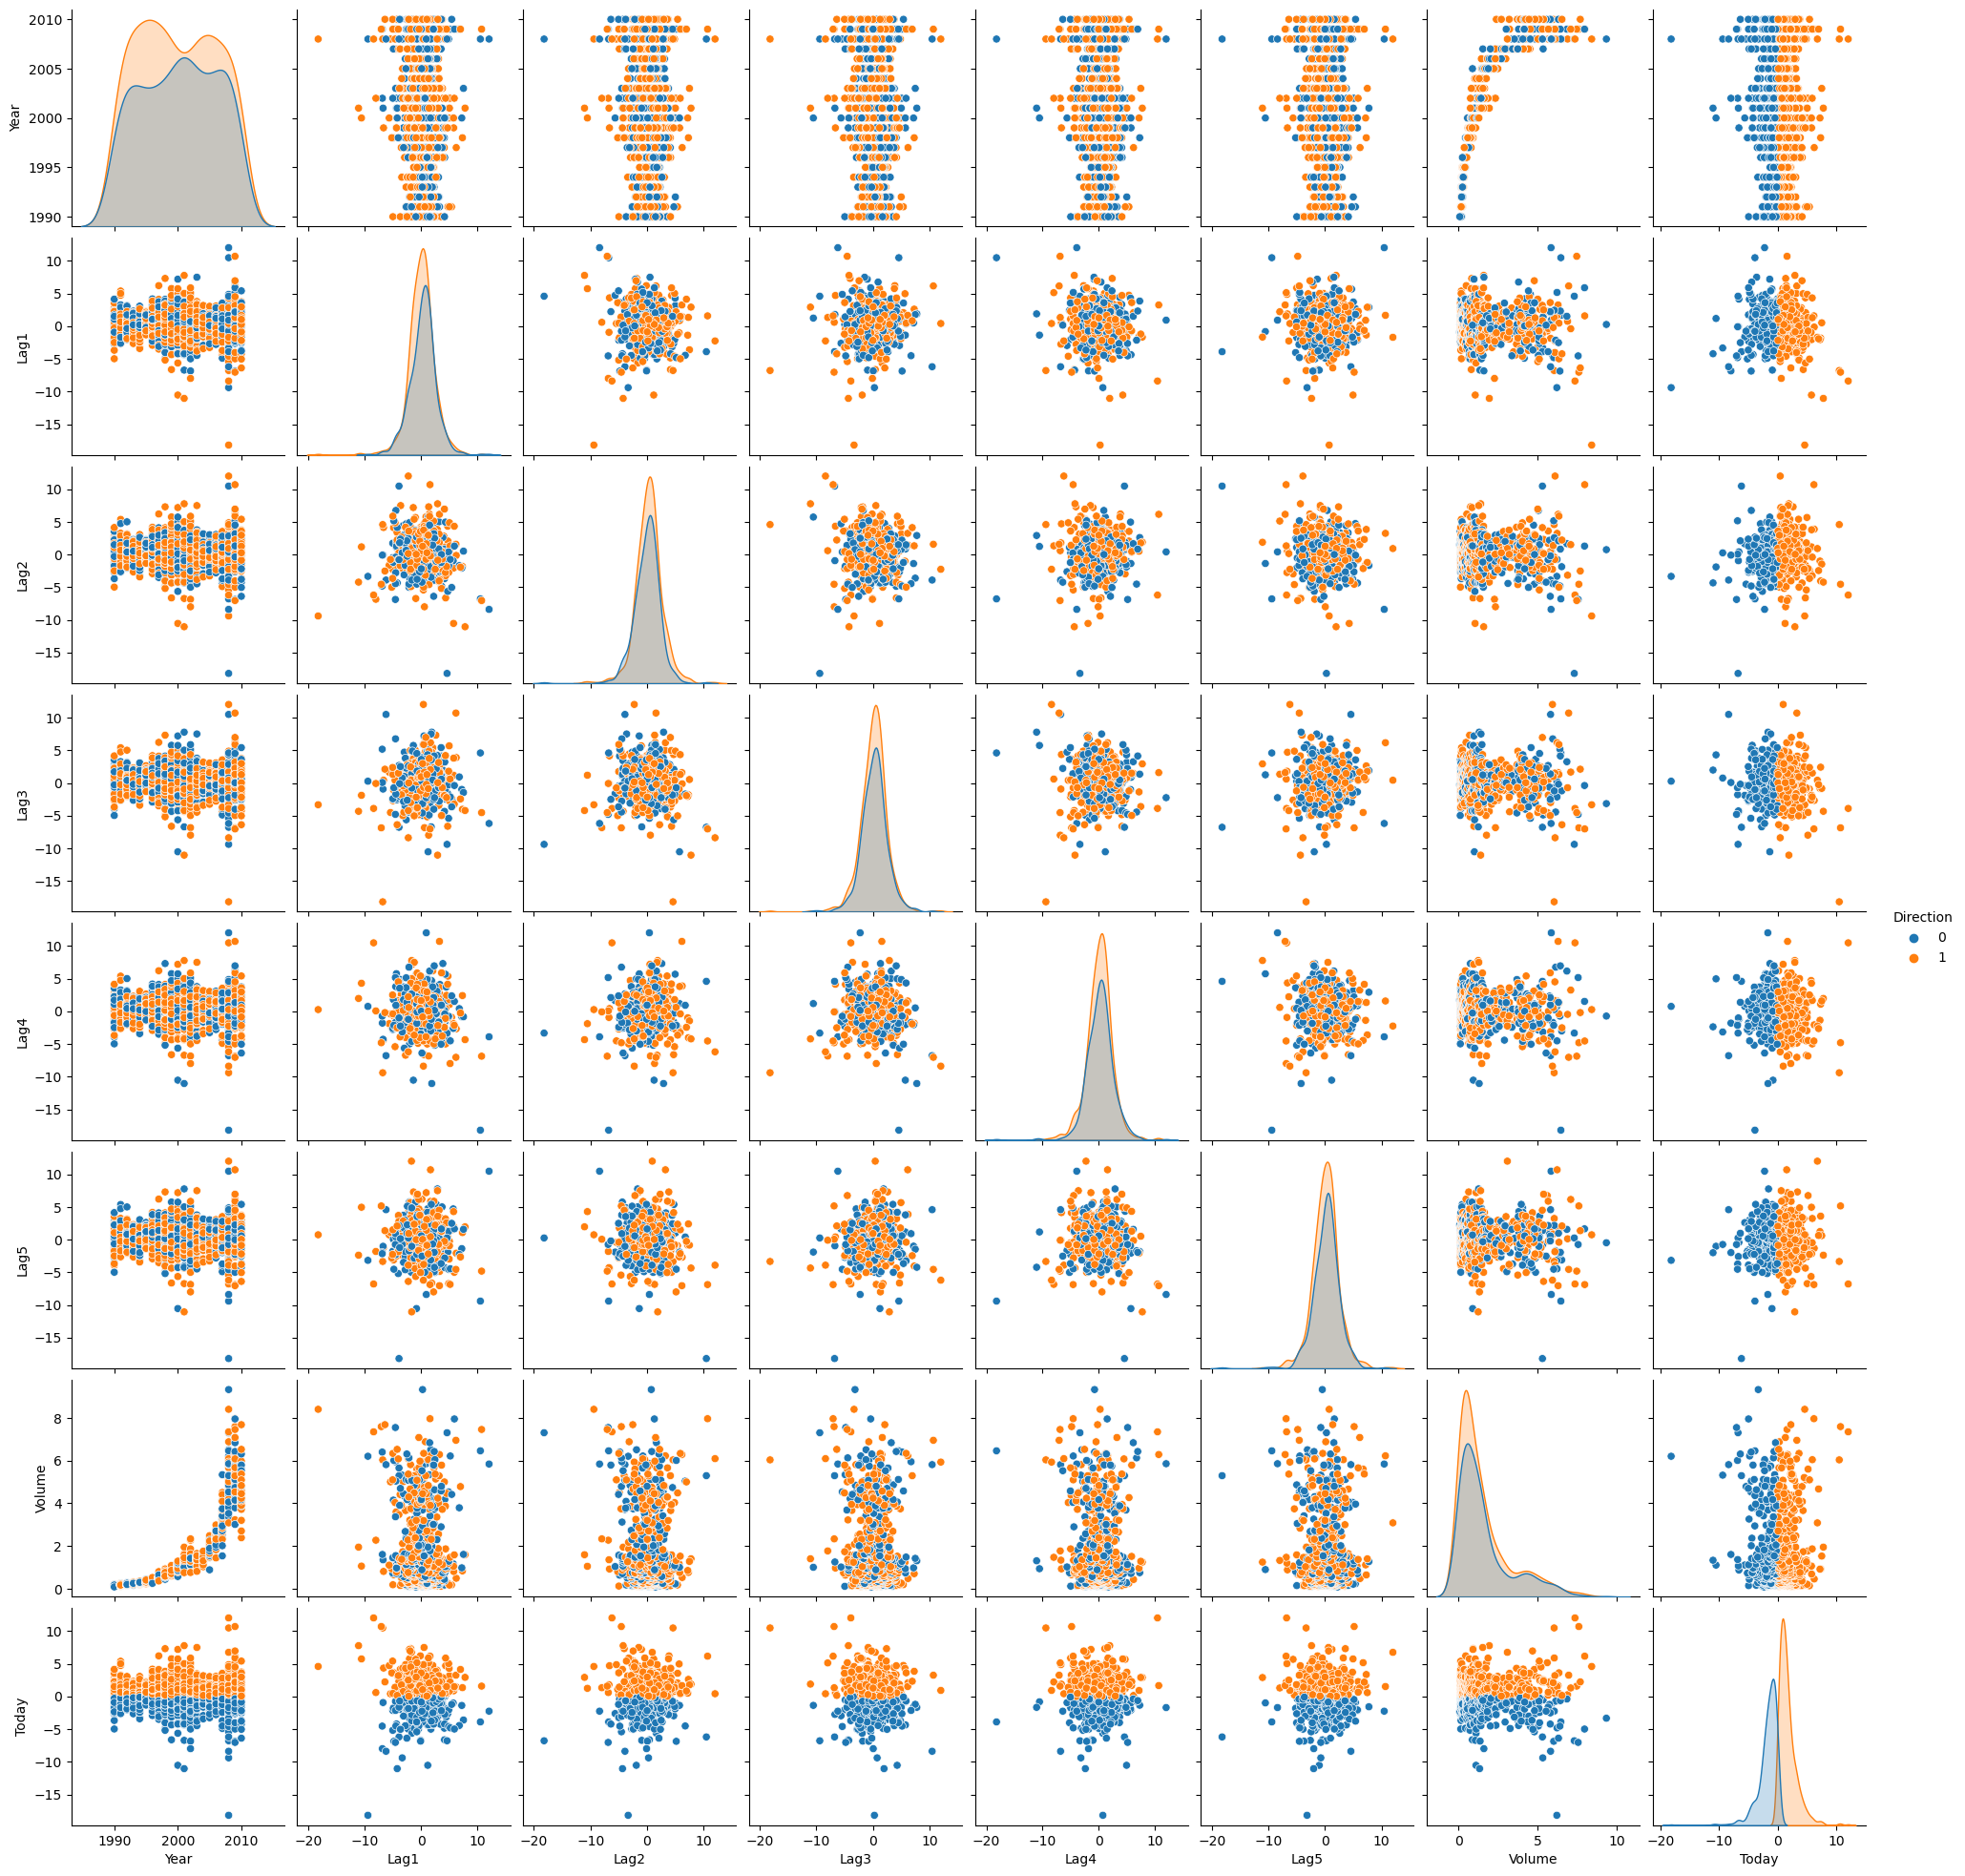

In [5]:
import seaborn as sns
sns.pairplot(weekly,hue = 'Direction')

In [6]:
print(weekly.describe())

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today    Direction  
count  1089.000000  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899     0.555556  
std       2.361285     1.686636     2.356927     0.497132  
min     -18.195000     0.087465   -18.195000     0.000000  
25%      -1.166000     0.332022  

In [9]:
print(weekly.corr())

               Year      Lag1      Lag2      Lag3      Lag4      Lag5  \
Year       1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519   
Lag1      -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183   
Lag2      -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499   
Lag3      -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657   
Lag4      -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675   
Lag5      -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000   
Volume     0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517   
Today     -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013   
Direction -0.022200 -0.050004  0.072696 -0.022913 -0.020549 -0.018168   

             Volume     Today  Direction  
Year       0.841942 -0.032460  -0.022200  
Lag1      -0.064951 -0.075032  -0.050004  
Lag2      -0.085513  0.059167   0.072696  
Lag3      -0.069288 -0.071244  -0.022913  
Lag4      -0.061075 -0.007826  -0.020549  
Lag5      -

Many of the plots look similar, with the different directions also looking similar, almost mirrored to the other direction. The only one that looks different from the rest is year x volume, shown by having a sort of trend rather than being similar. 
From the numerical data, the Year and Volume also have a high correlation, agreeing with the plots.

(b) Use the full data set to perform a logistic regression with
Direction as the response and the five lag variables plus Volume
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [19]:
X = weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
#Y = (weekly['Direction'] == 'Up').astype(int)
Y = weekly['Direction']

X = sm.add_constant(X)

logit = sm.Logit(Y, X)

answer = logit.fit()
answer.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 14 May 2023   Pseudo R-squ.:                0.006580
Time:                        22:58:50   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Lag 2 is statistically significant from its p-value

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [20]:
#slide 54 Lecture 4
from sklearn.metrics import confusion_matrix

pred = answer.predict(X) > 0.5
pred = pred.astype(int)

conf = confusion_matrix(Y,pred)
print('Confusion Matrix', conf)

Confusion Matrix [[ 54 430]
 [ 48 557]]


In [21]:
#Classification report Slide 68 Lecture 4
#(TP+TN)/(TP+FP+FN+TN)
print('Accuracy', accuracy_score(Y,pred))

Accuracy 0.5610651974288338


From Slide 54, the first column is when the prediced class = yes, while the second column is when predicted class = no. 

|TP FN| True Positive, False Negative

|FP TN| False Positive, True Negative

We have a 56% accuracy, which is the ratio of correctly predicted observations.We have a lot of false negatives which brought down our accuracy a lot.

(d) Now fit the logistic regression model using a training data period
from 1990 to 2008, with Lag2 as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [44]:
trainingData = weekly[(weekly['Year'] <= 2008)]
futureData = weekly[(weekly['Year'] >2008)]

X_train = trainingData[['Lag2']]
Y_train = trainingData['Direction']

X_fut = futureData[['Lag2']]
Y_fut = futureData[['Direction']]

X_train = sm.add_constant(X_train)
X_fut = sm.add_constant(X_fut)

logit = sm.Logit(Y_train,X_train)
result_train = logit.fit()

preds = result_train.predict(X_fut) > 0.5
preds = preds.astype(int)

conf = confusion_matrix(Y_fut,preds)
print('Confusion Matrix', conf)
print('Accuracy', accuracy_score(Y_fut,preds))

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
Confusion Matrix [[ 9 34]
 [ 5 56]]
Accuracy 0.625


(e) Repeat (d) using LDA.
Linear Discriminant Analysis

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

ldaPred = lda.predict(X_fut)
ldaConf = confusion_matrix(Y_fut,ldaPred)
print('Confusion Matrix', ldaConf)
print('Accuracy', accuracy_score(Y_fut,ldaPred))

Confusion Matrix [[ 9 34]
 [ 5 56]]
Accuracy 0.625


(f) Repeat (d) using QDA. Quadratic Discriminant Analysis

In [48]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, Y_train)

qdaPred = qda.predict(X_fut)

#qdaConf = confusion_matrix(Y_fut,qdaPred)

#print('Confusion Matrix', qdaConf)
print('Accuracy', accuracy_score(Y_fut,qdaPred))

Accuracy 0.41346153846153844


C:\Users\atkha\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\atkha\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\atkha\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\atkha\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


# Problem 14

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains
a value above its median, and a 0 if mpg contains a value below
its median. You can compute the median using the median()
function. Note you may find it helpful to use the data.frame()
function to create a single data set containing both mpg01 and
the other Auto variables.


In [49]:
auto = pd.read_csv('auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [51]:
mpg_median = auto['mpg'].median()
auto['mpg01'] = auto['mpg'] > mpg_median
auto['mpg01'] = auto['mpg01'].astype(int)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


(b) Explore the data graphically in order to investigate the association
between mpg01 and the other features. Which of the other
features seem most likely to be useful in predicting mpg01? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

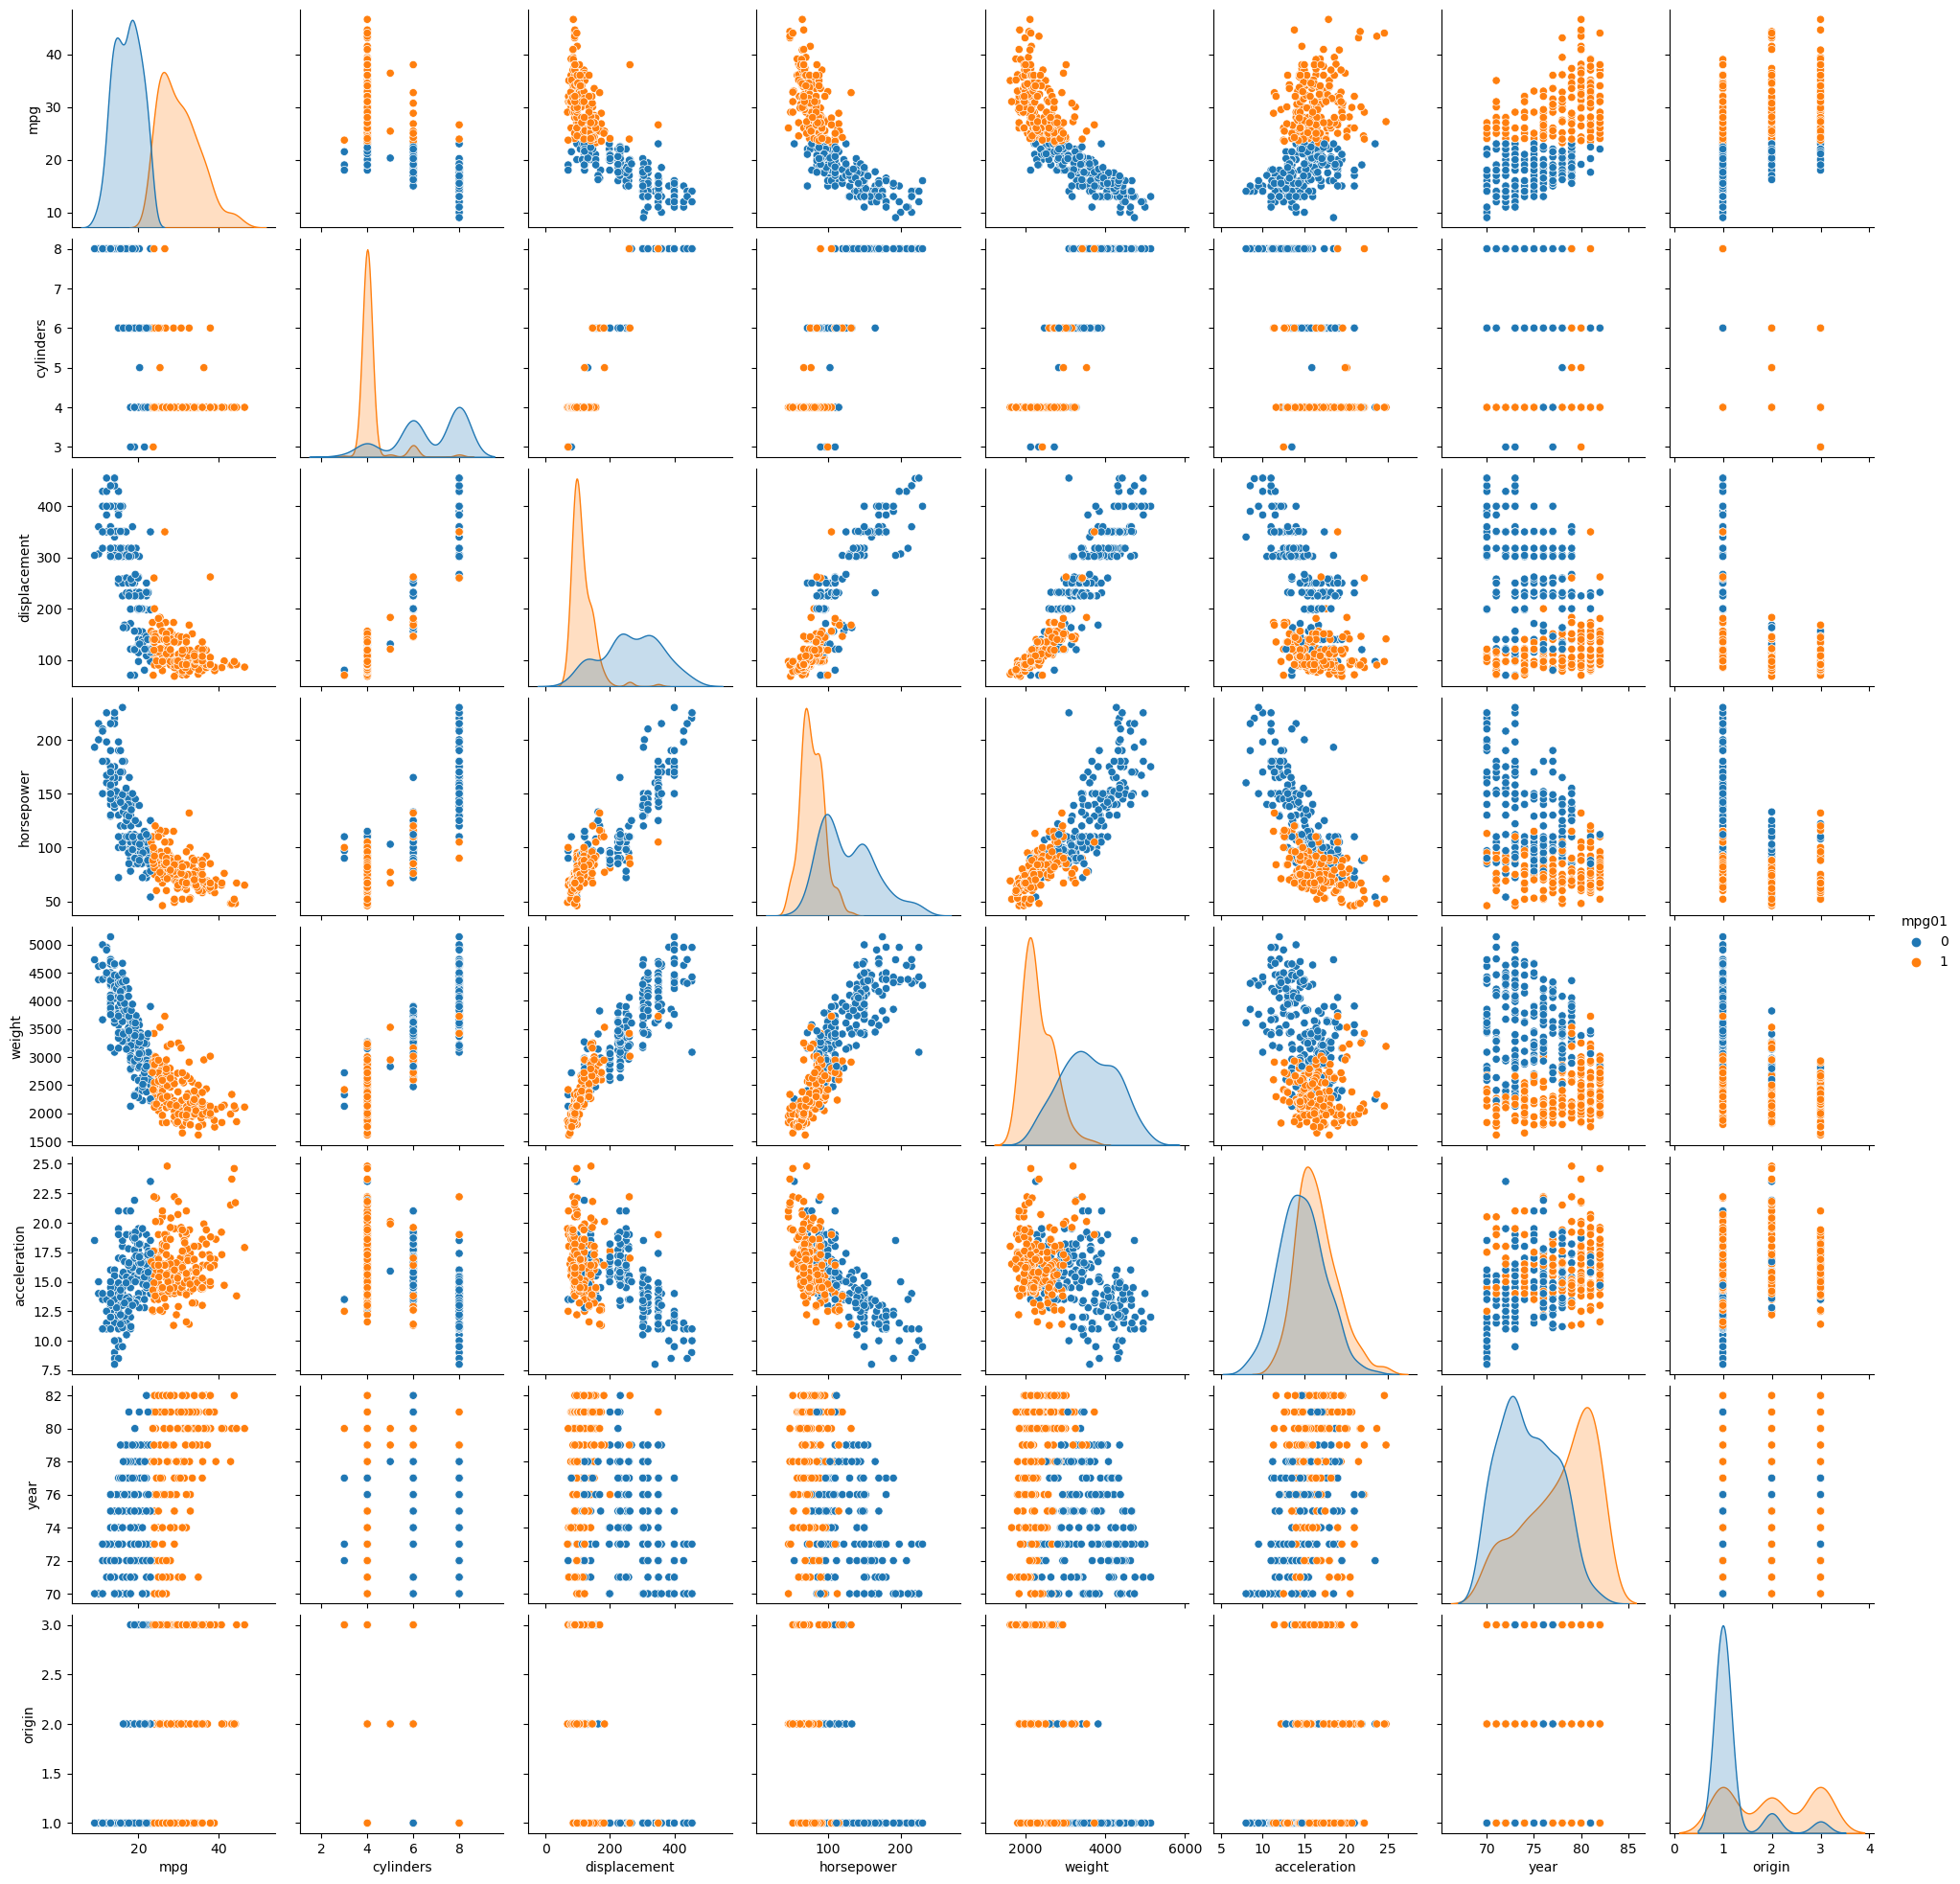

In [52]:
sns.pairplot(auto, hue = 'mpg01')

It looks like MPG is affected by weight, horsepower, and displacement as they follow some sort of exponential curve.

(c) Split the data into a training set and a test set.

In [57]:
from sklearn.model_selection import train_test_split

X = auto[['weight','horsepower','displacement']]
Y = auto['mpg01']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=50)

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [61]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
ldaPred = lda.predict(X_test)
print('Accuracy Score',accuracy_score(Y_test,ldaPred))
print('Test Error',1-accuracy_score(Y_test,ldaPred))

Accuracy Score 0.864321608040201
Test Error 0.13567839195979903


(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [63]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
qdaPred = qda.predict(X_test)
print('Accuracy Score',accuracy_score(Y_test,qdaPred))
print('Test Error',1-accuracy_score(Y_test,qdaPred))

Accuracy Score 0.8844221105527639
Test Error 0.11557788944723613
